In [14]:
import pandas as pd
import json
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import torch
from torch_geometric.data import Data

with open('full_addr.json', 'r') as file:
    data = json.load(file)

instances_df = pd.DataFrame(data['instances'])
num_instances = len(instances_df)
adj_matrix_2 = np.zeros((num_instances, num_instances), dtype=int)
connections_rows = []
for net in data['nets']:
    net_id = net['id']
    net_name = net['name']
    for connection in net['connections']:
        row = {
            'Net ID': net_id,
            'Net Name': net_name,
            'Source Instance ID': connection['source_instance_id'],
            'Source Terminal': connection['source_terminal'],
            'Target Instance ID': connection['target_instance_id'],
            'Target Terminal': connection['target_terminal'],
            'Connection Type': connection['connection_type'],
        }
        connections_rows.append(row)
connections_df = pd.DataFrame(connections_rows)
num_instances = len(instances_df)
adj_matrix = np.zeros((num_instances, num_instances, 2), dtype=int)
for index, row in connections_df.iterrows():
    source_id = row['Source Instance ID']
    target_id = row['Target Instance ID']
    connection_type = row['Connection Type']
    adj_matrix[source_id, target_id, connection_type] = 1
    adj_matrix_2[source_id, target_id] = 1
instances = instances_df.set_index('id')['name'].to_dict()
multi_index = pd.MultiIndex.from_product(
    [list(instances.values()), ['Connection Type 0', 'Connection Type 1']],
    names=['Node', 'Connection Type']
)
adj_matrix_2_df = pd.DataFrame(
    adj_matrix_2,
    index=list(instances.values()),
    columns=list(instances.values())
)
adj_matrix_df = pd.DataFrame(
    adj_matrix.reshape(num_instances, -1),
    index=list(instances.values()),
    columns=multi_index
)
print(adj_matrix_2_df.values)

[[0 0 0 0 0 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0]]


In [15]:
print(adj_matrix_df)

Node                      INPUT_a                             INPUT_b  \
Connection Type Connection Type 0 Connection Type 1 Connection Type 0   
INPUT_a                         0                 0                 0   
INPUT_b                         0                 0                 0   
INPUT_carry                     0                 0                 0   
OUTPUT                          0                 0                 0   
OUTPUT                          0                 0                 0   
nand                            0                 0                 0   
nand                            0                 0                 0   
nand                            0                 0                 0   
nand                            0                 0                 0   
nand                            0                 0                 0   
nand                            0                 0                 0   
nand                            0                 0

In [16]:
count_ones = adj_matrix_df.values.sum()

print("Number of 1's:", count_ones)

Number of 1's: 20


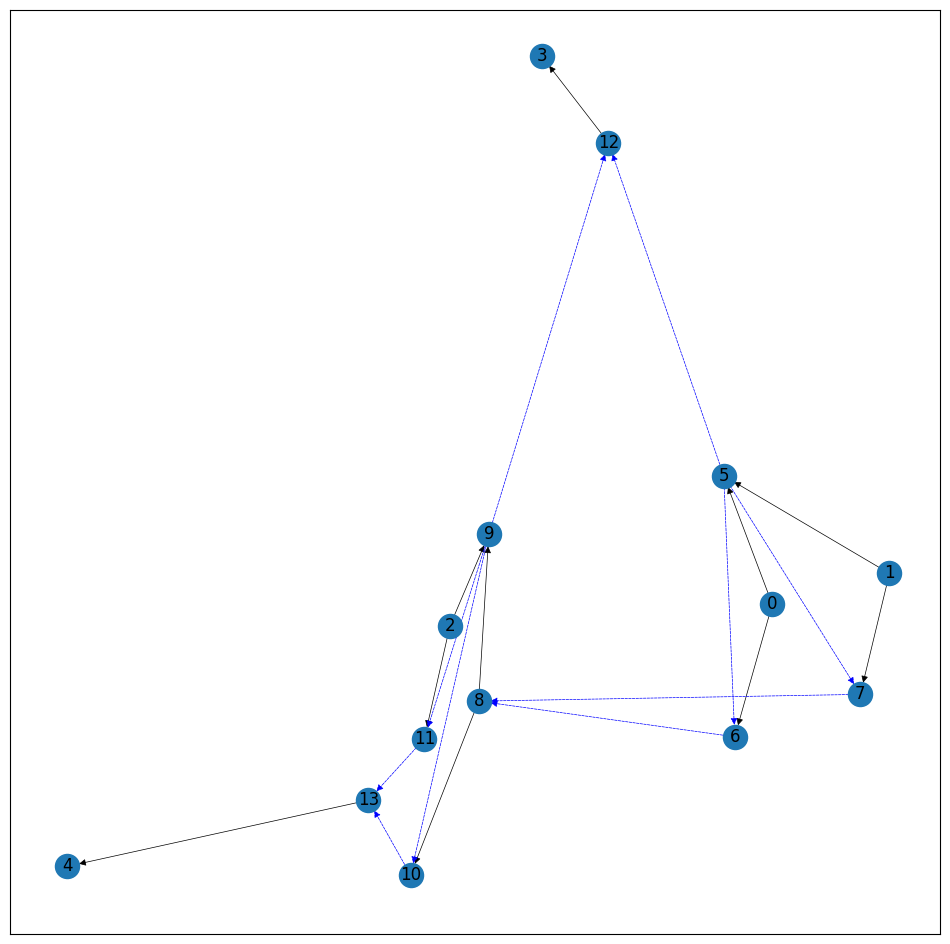

In [17]:
G = nx.DiGraph()
for instance in data['instances']:
    node_id = instance['id']
    node_type = instance['name']
    G.add_node(node_id, type=node_type)

for net in data['nets']:
    for connection in net['connections']:
        source_id = connection['source_instance_id']
        target_id = connection['target_instance_id']
        connection_type = connection['connection_type']
        G.add_edge(source_id, target_id, type=connection_type)
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, seed = 10)
node_size = 300
edge_width = 0.5
nx.draw_networkx_nodes(G, pos, node_size=node_size)
for edge in G.edges(data=True):
    if edge[2].get('type') == 1:
        nx.draw_networkx_edges(G, pos, edgelist=[edge], style='dashed', edge_color='blue', width=edge_width)
    else:
        nx.draw_networkx_edges(G, pos, edgelist=[edge], width=edge_width)

nx.draw_networkx_labels(G, pos)
plt.show()

In [21]:
with open('multib_addr.json', 'r') as file:
    data = json.load(file)
instances_df = pd.DataFrame(data['instances'])
num_instances = len(instances_df)
adj_matrix_2 = np.zeros((num_instances, num_instances), dtype=int)
connections_rows = []
for net in data['nets']:
    for connection in net['connections']:
        source_id = connection['source_instance_id']
        target_id = connection['target_instance_id']
        adj_matrix_2[source_id, target_id] = 1
instances = instances_df.set_index('id')['name'].to_dict()
adj_matrix_2_df = pd.DataFrame(
    adj_matrix_2,
    index=list(instances.values()),
    columns=list(instances.values())
)
print(adj_matrix_2_df.values)

[[0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]]


In [22]:
print(adj_matrix_df)

Node                      INPUT_a                             INPUT_b  \
Connection Type Connection Type 0 Connection Type 1 Connection Type 0   
INPUT_a                         0                 0                 0   
INPUT_b                         0                 0                 0   
INPUT_carry                     0                 0                 0   
OUTPUT                          0                 0                 0   
OUTPUT                          0                 0                 0   
nand                            0                 0                 0   
nand                            0                 0                 0   
nand                            0                 0                 0   
nand                            0                 0                 0   
nand                            0                 0                 0   
nand                            0                 0                 0   
nand                            0                 0

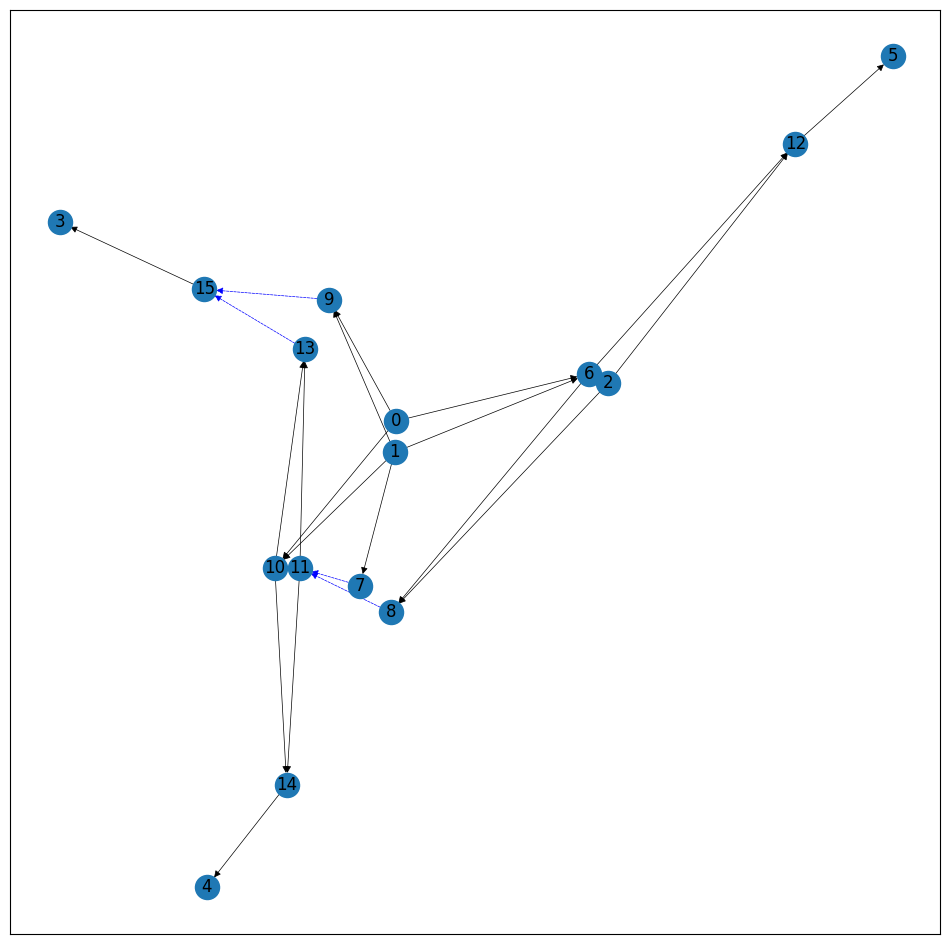

In [23]:
G = nx.DiGraph()
for instance in data['instances']:
    node_id = instance['id']
    node_type = instance['name']
    G.add_node(node_id, type=node_type)

for net in data['nets']:
    for connection in net['connections']:
        source_id = connection['source_instance_id']
        target_id = connection['target_instance_id']
        connection_type = connection['connection_type']
        G.add_edge(source_id, target_id, type=connection_type)
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, seed = 10)
node_size = 300
edge_width = 0.5
nx.draw_networkx_nodes(G, pos, node_size=node_size)
for edge in G.edges(data=True):
    if edge[2].get('type') == 1:
        nx.draw_networkx_edges(G, pos, edgelist=[edge], style='dashed', edge_color='blue', width=edge_width)
    else:
        nx.draw_networkx_edges(G, pos, edgelist=[edge], width=edge_width)

nx.draw_networkx_labels(G, pos)
plt.show()